In [1]:
# import MNIST from TENSORFLOW lib
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras import *
import numpy as np

In [2]:
# loading data
(X_train_data,Y_train_data),(X_test_data,Y_test_data) = mnist.load_data()

In [4]:
# peek at the data
print(len(X_test_data[12]))
print(X_test_data[120])

28
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  64  64 255 183 253 140
  121 121  38   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  91 212 240 240 240 246 246 253 252 252 252
  252 252  79   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 133 248 252 202 252 252 252 252 253 252 252 252
  252 252 198   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 226 252 252 161 239 172 172 102 110

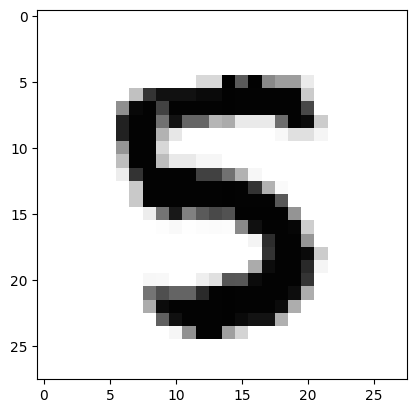

In [6]:
# peek more easy
plt.imshow(X_test_data[120], cmap='Greys')

In [7]:
# selecting from the dataset : train and test data (only 10k, can go up to 60K)
X_train_data = X_train_data[0:10000]
Y_train_data = Y_train_data[0:10000]
X_test_data = X_test_data[0:1000]
Y_test_data = Y_test_data[0:1000]

# reshape as needed
N = X_train_data.shape[0]
X_train = np.reshape(X_train_data,(N,784))
X_train = X_train / 255

Y_train = to_categorical(Y_train_data, num_classes = 10)

In [8]:
p = 8 
modele = Sequential()

modele.add(layers.Dense(p, input_dim = 784, activation = 'sigmoid'))

modele.add(layers.Dense(p, activation = 'sigmoid'))

modele.add(layers.Dense(10, activation = 'softmax'))

In [9]:
modele.compile(loss='categorical_crossentropy', optimizer='sgd', metrics = ['accuracy'])

In [10]:
print(modele.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 6280      
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 10)                90        
                                                                 
Total params: 6442 (25.16 KB)
Trainable params: 6442 (25.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [11]:
modele.fit(X_train, Y_train, batch_size = 16, epochs = 40)

Epoch 1/40
625/625 [==============================] - 0s 408us/step - loss: 2.3123 - accuracy: 0.1091
Epoch 2/40
625/625 [==============================] - 0s 380us/step - loss: 2.2756 - accuracy: 0.1209
Epoch 3/40
625/625 [==============================] - 0s 401us/step - loss: 2.2524 - accuracy: 0.1886
Epoch 4/40
625/625 [==============================] - 0s 378us/step - loss: 2.2235 - accuracy: 0.2700
Epoch 5/40
625/625 [==============================] - 0s 375us/step - loss: 2.1856 - accuracy: 0.3211
Epoch 6/40
625/625 [==============================] - 0s 385us/step - loss: 2.1379 - accuracy: 0.3510
Epoch 7/40
625/625 [==============================] - 0s 380us/step - loss: 2.0817 - accuracy: 0.3705
Epoch 8/40
625/625 [==============================] - 0s 426us/step - loss: 2.0204 - accuracy: 0.3849
Epoch 9/40
625/625 [==============================] - 0s 385us/step - loss: 1.9585 - accuracy: 0.3966
Epoch 10/40
625/625 [==============================] - 0s 382us/step - loss: 1.898

In [12]:
indice = int(input("choose one data (1 to 10000) : "))

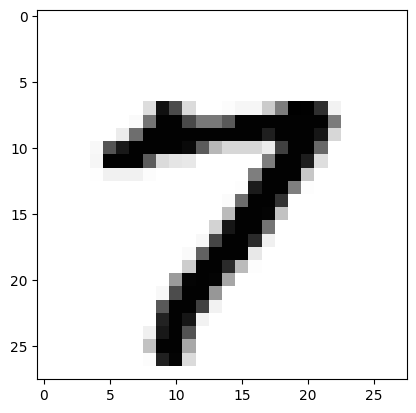

In [13]:
plt.imshow(X_train_data[indice], cmap='Greys')

In [14]:
letter = np.reshape(X_train_data[indice],(1,784))
letter = letter / 5

modele.predict(letter)

1/1 [==============================] - 0s 40ms/step


array([[2.9278111e-02, 6.7467499e-04, 6.9181260e-05, 2.2886485e-02,
        2.2971600e-03, 1.6369192e-02, 3.4366298e-05, 8.4747624e-01,
        7.8806337e-03, 7.3033959e-02]], dtype=float32)